# Preparation

In [16]:
%run "Utilities/Preparation.ipynb"
df152 = pd.read_csv("../data/2017-09-05.1.52.csv")
df152 = df152.rename(index=str, columns={'playerId': 'sessionId'})
df152.head()

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (24,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,serverTime,userTime,gameVersion,sessionId,playerBirthdate,playerRegion,playerCountry,playerGender,playerExternalId,...,customData.count,customData.plasmid,customData.language,customData.total,customData.controls,customData.message,customData.graphics,customData.chapter,customData.life,customData.source
0,1518748d-01f9-4c3a-a646-0b30a73953d1,2017-04-12T08:57:48.448Z,2017-04-12T08:57:49.752Z,915953b4-f9e1-41ca-acc4-4e4e90667102,b724663c-b32a-4079-9f8f-896762b272d1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a831eee1-39b2-489a-80e1-71a3bd77d434,2017-04-12T08:58:14.441Z,2017-04-12T08:58:15.799Z,915953b4-f9e1-41ca-acc4-4e4e90667102,b724663c-b32a-4079-9f8f-896762b272d1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""100""",NaN
2,47a6370e-6f4d-4b7e-b94e-c48ac1efb58d,2017-04-12T08:58:26.229Z,2017-04-12T08:58:27.575Z,915953b4-f9e1-41ca-acc4-4e4e90667102,b724663c-b32a-4079-9f8f-896762b272d1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""100""",NaN
3,fdc6e41c-8e6c-4b75-afdd-b7a215d12077,2017-04-12T08:58:37.640Z,2017-04-12T08:58:38.987Z,915953b4-f9e1-41ca-acc4-4e4e90667102,b724663c-b32a-4079-9f8f-896762b272d1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4fb6a1d5-5a07-4ec9-a3ac-0df0fca8b0ca,2017-04-12T09:30:51.879Z,2017-04-12T09:30:31.060Z,915953b4-f9e1-41ca-acc4-4e4e90667102,2d76c4ef-f260-4963-82f4-ff598d2a63b4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# List of users and their sessions

In [17]:
userSessionsRelevantColumns = ['customData.localplayerguid', 'sessionId']
userSessions = df152[df152['type']=='start'].loc[:,userSessionsRelevantColumns]

In [18]:
userSessions = userSessions.rename(index=str, columns={'customData.localplayerguid': 'userId'})
userSessions.head()

,userId,sessionId
0,"""4dbc2f43-421c-4e23-85d4-f17723ff8c66""",b724663c-b32a-4079-9f8f-896762b272d1
4,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",2d76c4ef-f260-4963-82f4-ff598d2a63b4
67,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",6a9893c1-da09-42c7-832e-4d0746fa779e
74,"""a6483353-5db1-4c6c-98d7-b6328d0f4456""",c430c60c-d7cb-4fc5-893b-dce440696caf
88,"""0fa88384-3115-4ebd-990d-6bd29214c04f""",72dc3209-bd46-4026-91f0-44d2a7298175


In [19]:
#groupedUserSessions = userSessions.groupby('customData.localplayerguid')
#groupedUserSessions.head()
#groupedUserSessions.describe().head()

# List of sessions with their checkpoints achievements

In [20]:
checkpointsRelevantColumns = ['sessionId', 'customData.localplayerguid', 'type', 'section', 'userTime']
checkpoints = df152.loc[:, checkpointsRelevantColumns]

checkpoints = checkpoints[checkpoints['type']=='reach'].loc[:,['section','sessionId','userTime']]
checkpoints = checkpoints[checkpoints['section'].str.startswith('tutorial', na=False)]
#checkpoints = checkpoints.groupby("sessionId")
#checkpoints = checkpoints.max()
checkpoints.head()

,section,sessionId,userTime
10,tutorial1.Checkpoint00,2d76c4ef-f260-4963-82f4-ff598d2a63b4,2017-04-12T09:32:37.505Z
18,tutorial1.Checkpoint01,2d76c4ef-f260-4963-82f4-ff598d2a63b4,2017-04-12T09:34:03.736Z
69,tutorial1.Checkpoint01,6a9893c1-da09-42c7-832e-4d0746fa779e,2017-04-12T09:46:39.764Z
79,tutorial1.Checkpoint00,c430c60c-d7cb-4fc5-893b-dce440696caf,2017-04-12T11:00:15.037Z
85,tutorial1.Checkpoint01,c430c60c-d7cb-4fc5-893b-dce440696caf,2017-04-12T11:01:47.407Z


# Assembly of both

In [21]:
#assembled = userSessions.combine_first(checkpoints)
assembled = pd.merge(userSessions, checkpoints, on='sessionId', how='outer')
assembled.head()

,userId,sessionId,section,userTime
0,"""4dbc2f43-421c-4e23-85d4-f17723ff8c66""",b724663c-b32a-4079-9f8f-896762b272d1,NaN,NaN
1,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",2d76c4ef-f260-4963-82f4-ff598d2a63b4,tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z
2,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",2d76c4ef-f260-4963-82f4-ff598d2a63b4,tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z
3,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",6a9893c1-da09-42c7-832e-4d0746fa779e,tutorial1.Checkpoint01,2017-04-12T09:46:39.764Z
4,"""a6483353-5db1-4c6c-98d7-b6328d0f4456""",c430c60c-d7cb-4fc5-893b-dce440696caf,tutorial1.Checkpoint00,2017-04-12T11:00:15.037Z


In [22]:
userSections = assembled.drop('sessionId', 1)
userSections.head()

,userId,section,userTime
0,"""4dbc2f43-421c-4e23-85d4-f17723ff8c66""",NaN,NaN
1,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z
2,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z
3,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",tutorial1.Checkpoint01,2017-04-12T09:46:39.764Z
4,"""a6483353-5db1-4c6c-98d7-b6328d0f4456""",tutorial1.Checkpoint00,2017-04-12T11:00:15.037Z


In [23]:
userSections = userSections.dropna()
userSections.head()

,userId,section,userTime
1,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z
2,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z
3,"""1a8924de-7cc6-4ff5-8735-4cddac309117""",tutorial1.Checkpoint01,2017-04-12T09:46:39.764Z
4,"""a6483353-5db1-4c6c-98d7-b6328d0f4456""",tutorial1.Checkpoint00,2017-04-12T11:00:15.037Z
5,"""a6483353-5db1-4c6c-98d7-b6328d0f4456""",tutorial1.Checkpoint01,2017-04-12T11:01:47.407Z


In [24]:
checkpoints = userSections.groupby("userId")
checkpoints = checkpoints.max()
checkpoints.head()

,section,userTime
userId,,
"""00cf9a9d-d588-47a9-87f4-ebd788e32b8b""",tutorial1.Checkpoint02,2017-06-23T12:41:56.251Z
"""06e4a3c6-f815-46d6-b695-77dbf61aee25""",tutorial1.Checkpoint00,2017-07-14T18:47:12.637Z
"""0782521c-f590-4d68-996a-63e906704c88""",tutorial1.Checkpoint04,2017-06-18T21:59:37.451Z
"""08211bff-aab7-4b84-9f77-a68f9bcae0a5""",tutorial1.Checkpoint00,2017-07-11T10:40:21.165Z
"""0923f664-d9d0-4e17-9109-c320005a0b23""",tutorial1.Checkpoint00,2017-06-13T12:02:39.539Z


# Time analysis

In [25]:
#userTimedSections = userSections.groupby("userId").agg({ "userTime": np.min })
#userTimedSections = userSections.groupby("userId")
userTimes = userSections.groupby("userId").agg({ "userTime": [np.min, np.max] })
userTimes["duration"] = pd.to_datetime(userTimes["userTime"]["amax"]) - pd.to_datetime(userTimes["userTime"]["amin"])
userTimes["duration"] = userTimes["duration"].map(lambda x: np.timedelta64(x, 's'))
userTimes = userTimes.sort_values(by=['duration'], ascending=[False])
userTimes.head()

userTime  \
                                                            amin   
userId                                                             
"deb089c0-9be3-4b75-9b27-28963c77b10c"  2017-06-07T11:42:02.641Z   
"9880ce9d-c6fc-476e-98a9-a9e8c8f7fcdc"  2017-05-13T14:36:22.300Z   
"257b955f-0252-46a8-9089-e37ad2d53f04"  2017-06-07T20:58:12.548Z   
"57badcdc-95a3-4436-83fc-a15ea8314ec3"  2017-06-10T15:51:43.328Z   
"dbbefcff-5387-48ed-861d-129bab40e297"  2017-08-03T05:05:53.083Z   

                                                                  \
                                                            amax   
userId                                                             
"deb089c0-9be3-4b75-9b27-28963c77b10c"  2017-07-21T16:08:02.204Z   
"9880ce9d-c6fc-476e-98a9-a9e8c8f7fcdc"  2017-06-09T12:33:33.835Z   
"257b955f-0252-46a8-9089-e37ad2d53f04"  2017-06-21T22:49:18.397Z   
"57badcdc-95a3-4436-83fc-a15ea8314ec3"  2017-06-23T16:38:30.379Z   
"dbbefcff-5387-48ed-861d-129bab40e297"  2017-08-10T05:19:23.402Z   

                                               duration  
                                                         
userId                                                   
"deb089c0-9be3-4b75-9b27-28963c77b10c" 44 days 04:25:59  
"9880ce9d-c6fc-476e-98a9-a9e8c8f7fcdc" 26 days 21:57:11  
"257b955f-0252-46a8-9089-e37ad2d53f04" 14 days 01:51:05  
"57badcdc-95a3-4436-83fc-a15ea8314ec3" 13 days 00:46:47  
"dbbefcff-5387-48ed-861d-129bab40e297"  7 days 00:13:30

(0, 85558)

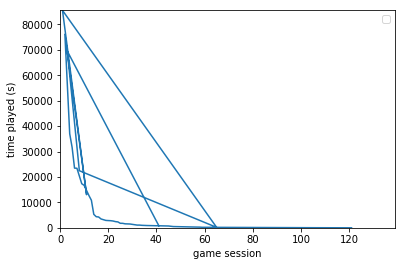

In [26]:
userTimes.loc[:,'duration']
userTimes = userTimes[4:]
userTimes["duration_seconds"] = userTimes["duration"].map(lambda x: pd.Timedelta(x).seconds)
maxDuration = np.max(userTimes["duration_seconds"])
userTimes["duration_rank"] = userTimes["duration_seconds"].rank(ascending=False)
userTimes.plot(x="duration_rank", y="duration_seconds")
plt.xlabel("game session")
plt.ylabel("time played (s)")
plt.legend('')
plt.xlim(0, 139)
plt.ylim(0, maxDuration)

In [27]:
userTimedSections = userSections.groupby("section").agg({ "userTime": np.min })
userTimedSections

,userTime
section,
tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z
tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z
tutorial1.Checkpoint02,2017-04-27T15:05:50.107Z
tutorial1.Checkpoint03,2017-05-13T07:21:42.528Z
tutorial1.Checkpoint04,2017-05-13T07:22:57.587Z
tutorial1.Checkpoint05,2017-05-13T07:32:41.399Z
tutorial1.Checkpoint06,2017-05-02T10:38:18.711Z
tutorial1.Checkpoint07,2017-05-13T07:37:44.347Z
tutorial1.Checkpoint08,2017-05-13T07:42:20.736Z


In [28]:
userTimedSections["firstReached"] = pd.to_datetime(userTimedSections["userTime"])
userTimedSections.head()

,userTime,firstReached
section,,
tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z,2017-04-12 09:32:37.505
tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z,2017-04-12 09:34:03.736
tutorial1.Checkpoint02,2017-04-27T15:05:50.107Z,2017-04-27 15:05:50.107
tutorial1.Checkpoint03,2017-05-13T07:21:42.528Z,2017-05-13 07:21:42.528
tutorial1.Checkpoint04,2017-05-13T07:22:57.587Z,2017-05-13 07:22:57.587


In [29]:
userTimedSections.drop('userTime', 1)
userTimedSections.head()

,userTime,firstReached
section,,
tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z,2017-04-12 09:32:37.505
tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z,2017-04-12 09:34:03.736
tutorial1.Checkpoint02,2017-04-27T15:05:50.107Z,2017-04-27 15:05:50.107
tutorial1.Checkpoint03,2017-05-13T07:21:42.528Z,2017-05-13 07:21:42.528
tutorial1.Checkpoint04,2017-05-13T07:22:57.587Z,2017-05-13 07:22:57.587


In [30]:
userTimedSections["firstCompletionDuration"] = userTimedSections["firstReached"].diff()
userTimedSections.head()

,userTime,firstReached,firstCompletionDuration
section,,,
tutorial1.Checkpoint00,2017-04-12T09:32:37.505Z,2017-04-12 09:32:37.505,NaT
tutorial1.Checkpoint01,2017-04-12T09:34:03.736Z,2017-04-12 09:34:03.736,0 days 00:01:26.231000
tutorial1.Checkpoint02,2017-04-27T15:05:50.107Z,2017-04-27 15:05:50.107,15 days 05:31:46.371000
tutorial1.Checkpoint03,2017-05-13T07:21:42.528Z,2017-05-13 07:21:42.528,15 days 16:15:52.421000
tutorial1.Checkpoint04,2017-05-13T07:22:57.587Z,2017-05-13 07:22:57.587,0 days 00:01:15.059000
